In [5]:
# 5장 복습하기 : mpg 데이터 파악해보기
import pandas as pd
mpg = pd.read_csv('/Users/hanminjeong/Desktop/School/2-2/jupyterLab/Data/mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [18]:
# 고속도로 연비를 나타내는 변수(컬럼) 이름을 hwy에서 highway로 변경
# 도시 연비를 나타내는 변수(컬럼) 이름을 cty에서 city로 변경
mpg = mpg.rename(columns = {'hwy' : 'highway', 'cty' : 'city'})
mpg.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact


In [23]:
# 도시연비와 고속도로 연비를 합한 값인 합산연비 total 파생변수(컬럼) 추가
mpg['total'] = (mpg['highway'] + mpg['city'])
mpg.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47


In [106]:
# 도시연비와 고속도로 연비를 합한 값인 합산연비 total 변수를 2로 나눈 평균연비 mean 파생변수(컬럼) 추가
mpg['mean'] = mpg['total'] / 2
mpg.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category,total,mean,grade
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,23.5,B


In [108]:
# 자동차 합산연비 total 변수(컬럼)의 요약통계량 구하기
# 요약 통계량에서 25%, 75% 값 확인하기
mpg['mean'].describe()
mpg.describe()

,displ,year,cyl,city,highway,total,mean
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171,40.299145,20.149573
std,1.291959,4.509646,1.611534,4.255946,5.954643,10.100580,5.050290
min,1.600000,1999.000000,4.000000,9.000000,12.000000,21.000000,10.500000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000,31.000000,15.500000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000,41.000000,20.500000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000,47.000000,23.500000
max,7.000000,2008.000000,8.000000,35.000000,44.000000,79.000000,39.500000


In [118]:
# 합산연비 total 값에 따라 
# 합산연비 total 값이 75% 값 초과이면 'A'
# 합산연비 total 값이 25% 값 이상 ~ 75% 값 미만이면 'B'
# 합산연비 total 값이 25% 값 미만이면 'C'
# 값을 갖는 'grade' 파생변수 추가
import numpy as np

mpg['grade'] = np.where(mpg['mean'] > 23.5, 'A', 
               np.where(mpg['mean'] > 15.5, 'B', 'C'))
mpg.head(2)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category,total,mean,grade
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,23.5,B
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50,25.0,A


In [120]:
# 합산 연비 값에 따라 A, B, C 등급으로 분류된 데이터 빈도수 테이블 생성
mpg['grade'].unique()
mpg['grade'].value_counts()

grade
B    124
C     60
A     50
Name: count, dtype: int64

<Axes: xlabel='grade'>

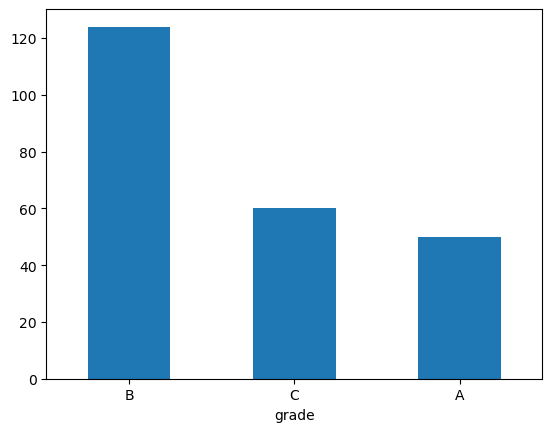

In [122]:
# 합산 연비 값에 따라 A, B, C 등급으로 분류된 데이터 개수 테이블로 막대 그래프 그리기
mpg['grade'].value_counts().plot.bar(rot = 0)

In [124]:
# A등급인 'manufacturer', 'model', 'total' 추려보기
mpg.query('grade == "A"')[['manufacturer', 'model', 'total']]\
    .query('total >= 60')[['manufacturer', 'model']]

,manufacturer,model
99,honda,civic
104,honda,civic
105,honda,civic
106,honda,civic
195,toyota,corolla
196,toyota,corolla
197,toyota,corolla
212,volkswagen,jetta
221,volkswagen,new beetle
222,volkswagen,new beetle


In [142]:
# 6장 시작!
exam = pd.read_csv('/Users/hanminjeong/Desktop/School/2-2/jupyterLab/Data/exam.csv')
exam.sort_values('science') # 오름차순 정렬 "ascending = True"가 기본 값
# exam.sort_values('science', ascending = False) # 내림차순 정렬
exam.sort_values(['nclass', "science"], ascending = [True, False]) # 오름차순 반별 내림차순 과학 점수 정렬

,id,nclass,math,english,science
2,3,1,45,86,78
1,2,1,60,97,60
3,4,1,30,98,58
0,1,1,50,98,50
5,6,2,50,89,98
4,5,2,25,80,65
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
9,10,3,50,98,45


In [148]:
# mpg.sort_values('total', ascending=False).head()
mpg.sort_values(['manufacturer','total'], ascending=False)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category,total,mean,grade
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5,A
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5,A
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0,A
210,volkswagen,gti,2.0,2008,4,auto(s6),f,22,29,p,compact,51,25.5,A
215,volkswagen,jetta,2.0,2008,4,auto(s6),f,22,29,p,compact,51,25.5,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,41,20.5,B
11,audi,a4 quattro,2.8,1999,6,auto(l5),4,15,25,p,compact,40,20.0,B
14,audi,a4 quattro,3.1,2008,6,manual(m6),4,15,25,p,compact,40,20.0,B
15,audi,a6 quattro,2.8,1999,6,auto(l5),4,15,24,p,midsize,39,19.5,B
